In [239]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from ipywidgets import interact_manual

In [2]:
rad = lambda x: x/180*np.pi

In [264]:
import importlib
import two_d_tracer
importlib.reload(two_d_tracer)

<module 'two_d_tracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/two_d_tracer.py'>

# Mirrors

In [9]:
scene = two_d_tracer.Scene([two_d_tracer.Ray([-10, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
                           [two_d_tracer.Mirror([0,0],[-np.cos(rad(45/2)),-np.sin(rad(45/2))]),
                           two_d_tracer.Mirror([0,-5], [0,1])])

In [10]:
scene.rays

[Ray([-10.   -2.5], [1. 0.]),
 Ray([-10.    -1.25], [1. 0.]),
 Ray([-10.   0.], [1. 0.]),
 Ray([-10.     1.25], [1. 0.]),
 Ray([-10.    2.5], [1. 0.])]

In [11]:
scene.run(margin=1e-10)

<IPython.core.display.Javascript object>


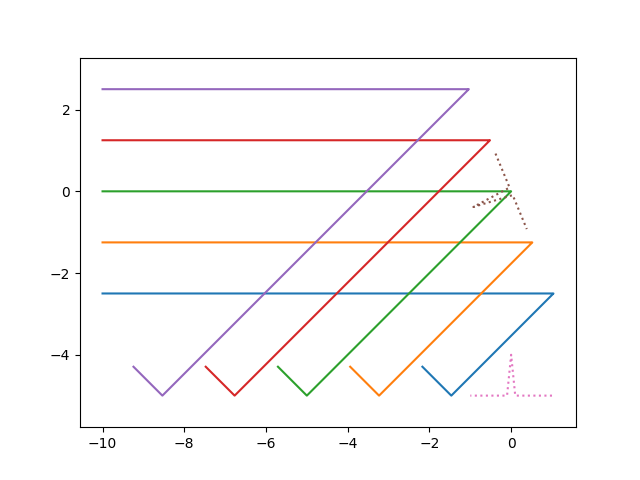

(-10.551776695296637, 1.5873106012293765, -5.375000000000001, 2.875)

In [12]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# Refracting surfaces

In [18]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-10, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.RefractiveSurface([0,0], [-1, -1], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [19]:
scene.run()

<IPython.core.display.Javascript object>


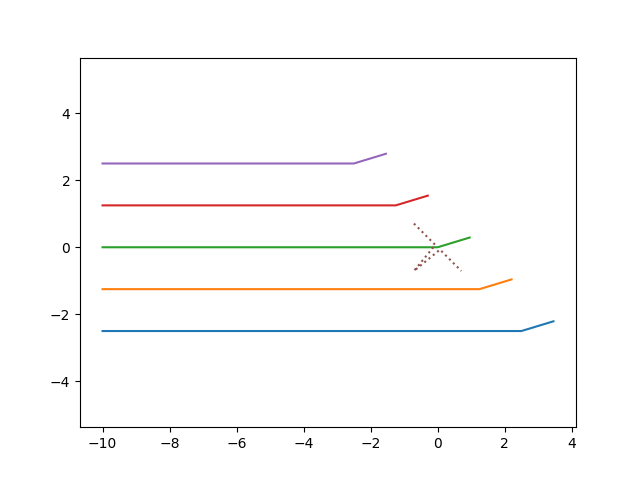

(-10.672847144899352, 4.129790042886396, -2.764513811559352, 3.054790042746397)

In [20]:
fig, ax = plt.subplots()
scene.plot(ax)    
ax.axis("equal")

In [21]:
scene.rays

[Ray([ 3.4569429  -2.20972377], [0.9569429  0.29027623]),
 Ray([ 2.2069429  -0.95972377], [0.9569429  0.29027623]),
 Ray([0.9569429  0.29027623], [0.9569429  0.29027623]),
 Ray([-0.2930571   1.54027623], [0.9569429  0.29027623]),
 Ray([-1.5430571   2.79027623], [0.9569429  0.29027623])]

In [22]:
scene.rays[0].angle

0.2945154851081369

In [23]:
# Compare to Snell's (algebra in Xournal)
rad(45) - np.arcsin(1/1.5*np.sin(rad(45)))

0.29451548510813697

# A glass slab

In [24]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,-0.5]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.RefractiveSurface([0,0], [-1, 0], None, 1, 1.5),
                two_d_tracer.RefractiveSurface([2,0], [1, 0], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [25]:
scene.rays[0].angle

-0.4636476090008061

In [26]:
np.arcsin(1/1.5*np.sin(scene.rays[0].angle))

-0.30274595162300433

In [27]:
scene.step()
scene.propagate(1e-14)
print(scene.rays[0].angle)
scene.step()
scene.propagate(1e-14)
scene.step()

-0.30274595162300433


<IPython.core.display.Javascript object>


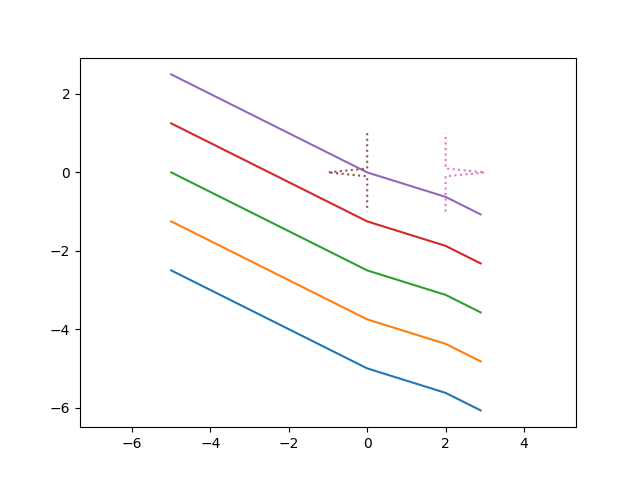

(-5.4, 3.4, -6.500504075207105, 2.9285954321527194)

In [28]:
fig, ax = plt.subplots()
scene.plot(ax)   
ax.axis("equal")

In [29]:
scene.rays[0].angle

-0.463647609000806

# Retroreflector

In [30]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(0.1,2.5, 5)],
    "objects": [two_d_tracer.RefractiveSurface([0,2], [1, 1], None, 1, 1.5),
                two_d_tracer.RefractiveSurface([0,-2], [1, -1], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [31]:
scene.run()

<IPython.core.display.Javascript object>


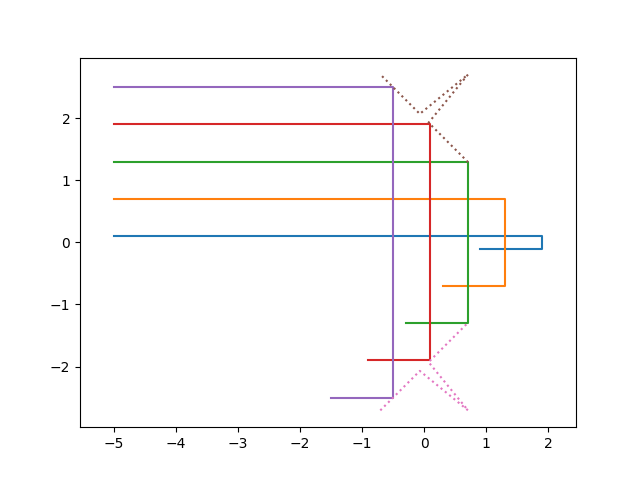

(-5.345, 2.244999999999999, -2.9778174593052023, 2.9778174593052023)

In [32]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

In [33]:
scene.rays

[Ray([ 0.9 -0.1], [-1.  0.]),
 Ray([ 0.3 -0.7], [-1.  0.]),
 Ray([-0.3 -1.3], [-1.  0.]),
 Ray([-0.9 -1.9], [-1.  0.]),
 Ray([-1.5 -2.5], [-1.  0.])]

# Ray canvas

In [38]:
canvas = two_d_tracer.RayCanvas([0,-3], [0,1])
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.RefractiveSurface([0,0], [1, 1], None, 1, 1.5),
                canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [39]:
scene.run()

In [40]:
canvas

RayCanvas([0, -3], [0. 1.]): [2.5, 1.2499999999999996, 6.66133814775094e-16, -1.2499999999999991, -2.4999999999999987]

<IPython.core.display.Javascript object>


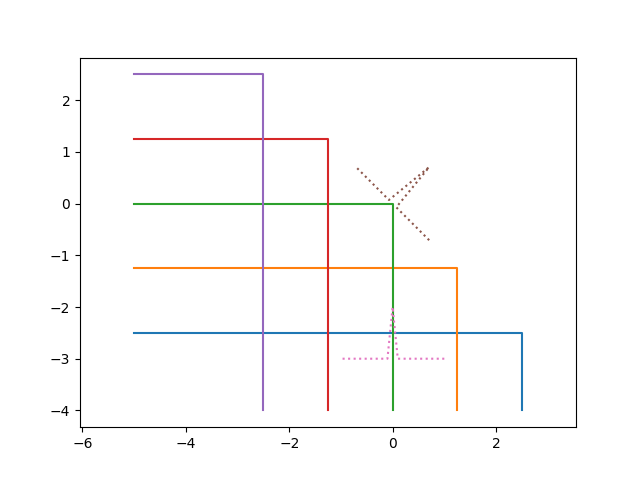

(-5.375, 2.875, -4.32500000021, 2.82500000001)

In [41]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# Sphere

In [265]:
canvas = two_d_tracer.RayCanvas([0,0],[0,1])
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-2.6,2.6, 10)],
    "objects": [two_d_tracer.Sphere([0,0], 2.5, None, 1, 1.5),two_d_tracer.ReflectiveSphere([8,0], 2.5, None, 1, 1.5),
                canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [266]:
scene.run()
scene.propagate(2)

<IPython.core.display.Javascript object>


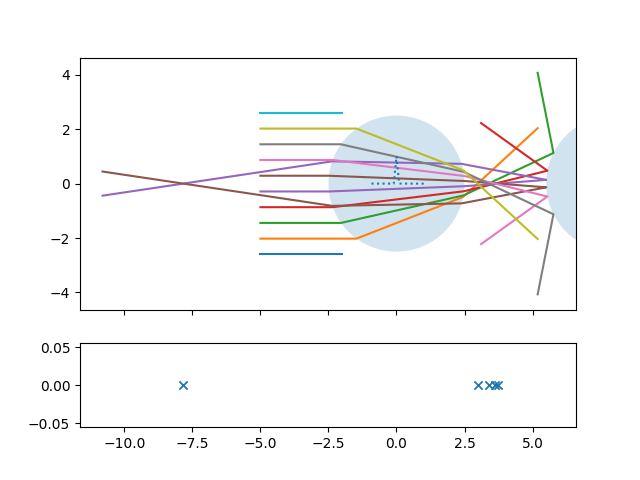

(-11.630301494360825, 6.596707329560326, -4.476850968607872, 4.476850968607868)

In [267]:
fig, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(3,1)})
scene.plot(ax[0])
ax[1].plot(canvas.points, [0 for p in canvas.points], "x")
ax[0].axis("equal")

# Focus in the sphere

In [297]:
canvas = two_d_tracer.RayCanvas([0,0],[0,1])
n2 = 3
# two_d_tracer.ReflectiveSphere([8,0], 2.5, 1, 1.5)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-1, y], [1,0]) for y in np.linspace(-0.1,0.1, 50)],
    "objects": [two_d_tracer.Sphere([2.5,0], 2.5, [rad(90), rad(-90)], 1, n2),
                canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [298]:
scene.run()

<IPython.core.display.Javascript object>


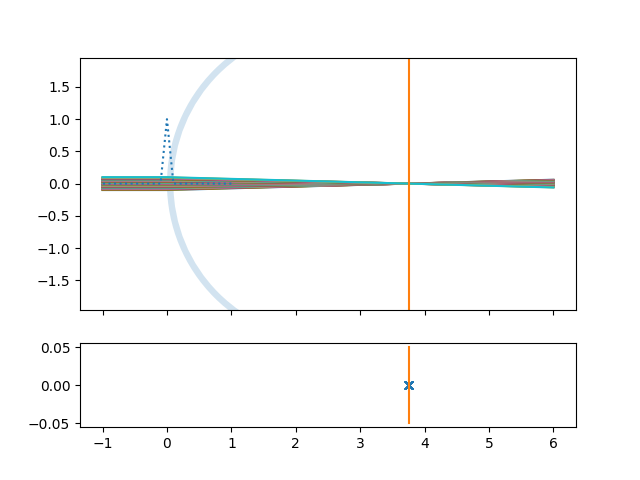

In [299]:
fig, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(3,1)})
scene.plot(ax[0])
ax[1].plot(canvas.points, [0 for p in canvas.points], "x")
ax[0].axis("equal")

# Focus for a single spherical surface in the paraxial approximation, rays colimated:
f = (n2 * 2.5 / (n2-1))
ax[0].plot([f,f], [-2.5,2.5])
ax[1].plot([f,f], [-0.05,0.05])

# Limits

## Mirrors

In [76]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.Mirror([0,0], [-1,1], 2.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [77]:
scene.run()

<IPython.core.display.Javascript object>


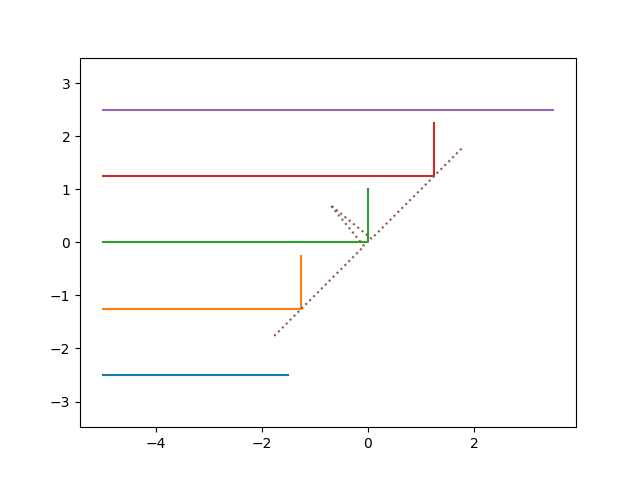

(-5.42500000001, 3.92500000021, -2.75, 2.75)

In [78]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

## Refractive planes

In [140]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0.3]) for y in np.linspace(-1.5,1.5, 11)],
    "objects": [two_d_tracer.RefractiveSurface([-1,1], [-1,1], np.sqrt(2), 1, 1.3),
                two_d_tracer.RefractiveSurface([1,1], [1,1], np.sqrt(2), 1, 1.3),
                two_d_tracer.RefractiveSurface([0,0], [0,-1], 2, 1, 1.3)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [141]:
scene.run()

<IPython.core.display.Javascript object>


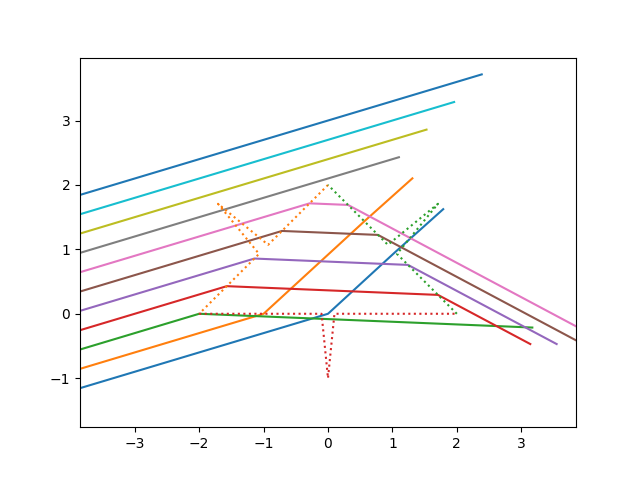

(-2.5, 2.5)

In [142]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")
ax.set_xlim(-2.5,2.5)

## Spheres

In [235]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-2.6,2.6, 10)],
    "objects": [two_d_tracer.Sphere([0,0], 2.5, [rad(150), rad(-150)], 1, 1.5),
               two_d_tracer.ReflectiveSphere([4,0], 2.5, [rad(-50), rad(50)])]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [236]:
scene.run()

<IPython.core.display.Javascript object>


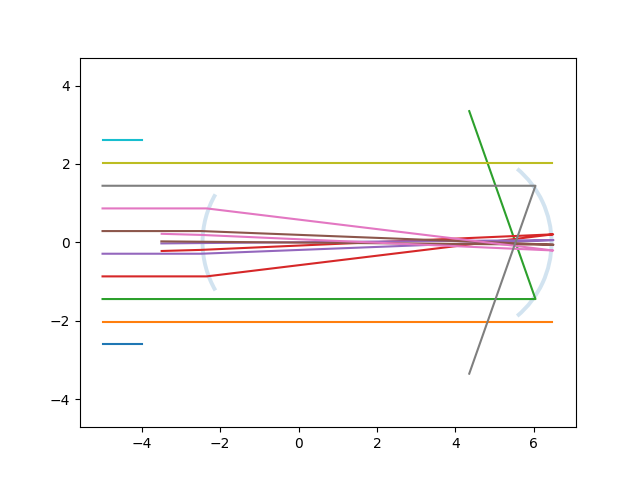

(-5.574965282633034,
 7.0742709352937165,
 -3.6824830157951975,
 3.682483015795196)

In [237]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# The lensmaker equation
$$\frac{1}{f}=(n-1)\left(\frac{1}{R_1}-\frac{1}{R_2}\right)$$ for a think lens. This doesn't quite work, so let's try $$\frac{1}{f} = (n-1) \left( \frac{1}{R_1} - \frac{1}{R_2} + \frac{(n-1)d}{n R_1 R_2} \right),$$
then the distance from the end of the lens to the focus is given as
$$\mbox{BFD} = f \left( 1 - \frac{ (n-1) d}{n R_1} \right),$$
which is taken from https://en.wikipedia.org/wiki/Focal_length.

<IPython.core.display.Javascript object>


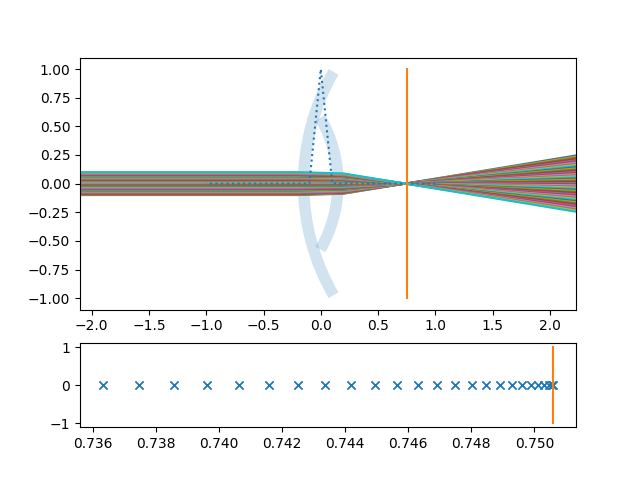

interactive(children=(FloatSlider(value=1.5, description='n', max=4.5, min=-1.5), FloatSlider(value=2.0, descr…

In [310]:
def f(n, R1, R2):
    return 1 / ((n-1)*(1/R1-1/R2))

def f(n, R1, R2, d):
    return 1 / ((n-1)*(1/R1 - 1/R2 + ((n-1)*d)/(n*R1*R2)))

def ffd(f, n, R1, R2, d):
    return f*(1-(n-1)*d/(n*R1))

fig, ax = plt.subplots(2, gridspec_kw={"height_ratios":(3,1)})

@interact_manual
def draw(n=1.5, R1=2., R2=-2., d=1.):
    fc = f(n, R1, R2, d)
    ffdc = ffd(fc, n, R1, R2, d) + d/2
    canvas = two_d_tracer.RayCanvas([0,0],[0,1])
    sc_dsc = {
        "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-0.1,0.1, 50)],
        "objects": [two_d_tracer.Sphere([R1-d/2,0], R1, [rad(150), rad(-150)], 1, n),
                    two_d_tracer.Sphere([R2+d/2,0], -R2, [rad(-30), rad(30)], 1, n), canvas]
    }
    scene = two_d_tracer.Scene(**sc_dsc)
    scene.run()
    scene.propagate(2)
    ax[0].clear()
    ax[1].clear()
    scene.plot(ax[0])
    ax[0].plot([ffdc,ffdc], [-1, 1])
    ax[1].plot(canvas.points, [0 for p in canvas.points], "x")
    ax[1].plot([ffdc,ffdc], [-1, 1])
    ax[0].axis("equal")
    ax[0].set_xlim(-1, 1.5*ffdc)
    print(ffdc)

In [302]:
f(2,1,-1,1)

0.6666666666666666